# Test and results.

In [1]:
from HMM.Markovify import *
from HMM.Utils.CrossValidation import cross_validation_score

from nltk.corpus import brown

import pandas as pd
import numpy as np
import random
from math import ceil
import importlib
import json

from HMM.Utils.ProgressBar import log_progress

# Accuracy for news text.

In [2]:
corpus = brown.tagged_sents(categories='news', tagset='universal')

model = Markovify(smoothing='max')
brown_news_score = cross_validation_score(model, sentences=corpus, cv=10, verbose=False)
print(json.dumps(brown_news_score, indent=1))
print('Best accuracy: {}.'.format(np.max([model['accuracy'] for model in brown_news_score])))

c:\users\cresp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[
 {
  "accuracy": 0.941029207232267,
  "precision": 0.8997129504086413,
  "recall": 0.941029207232267
 },
 {
  "accuracy": 0.9423136565698336,
  "precision": 0.8787685902119633,
  "recall": 0.9423136565698336
 },
 {
  "accuracy": 0.9319174880601565,
  "precision": 0.8698109332750127,
  "recall": 0.9319174880601565
 },
 {
  "accuracy": 0.9427545416138572,
  "precision": 0.9628614027157445,
  "recall": 0.9427545416138572
 },
 {
  "accuracy": 0.9488,
  "precision": 0.9630455449083873,
  "recall": 0.9488
 },
 {
  "accuracy": 0.9469583458195985,
  "precision": 0.8778813946266051,
  "recall": 0.9469583458195985
 },
 {
  "accuracy": 0.9274833726668097,
  "precision": 0.8673606413703211,
  "recall": 0.9274833726668097
 },
 {
  "accuracy": 0.934455352968677,
  "precision": 0.9576256815387562,
  "recall": 0.934455352968677
 },
 {
  "accuracy": 0.9174902107029648,
  "precision": 0.8677108703806743,
  "recall": 0.9174902107029648
 },
 {
  "accuracy": 0.9288348450114622,
  "precision": 0.954048660

In [3]:
sample_idx = random.sample(range(0, len(corpus)), ceil(len(corpus) * 0.2))
sample_corpus = list(corpus[i] for i in sample_idx)

nfolds = [3, 5, 10]
scores = []
for n in log_progress(nfolds):
    model = Markovify(smoothing='max')
    model_scores = cross_validation_score(model, sentences=sample_corpus, cv=n, verbose=False)
    scores.append(np.max([model['accuracy'] for model in model_scores]))
    
print(scores)

c:\users\cresp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\cresp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[0.886558481322719, 0.8947098099640473, 0.9028046421663443]


# Comparison of different smoothings.

In [4]:
corpus = brown.tagged_sents(categories='news', tagset='universal')

model_laplace = Markovify(smoothing='laplace', alpha=1)
brown_news_accuracy_laplace = cross_validation_score(model_laplace, sentences=corpus, verbose=False)
print('Best accuracy for Laplace smoothing: {}.'.format(np.max([model['accuracy'] for model in brown_news_accuracy_laplace])))

model_max = Markovify(smoothing='max')
brown_news_accuracy_max = cross_validation_score(model_max, sentences=corpus, verbose=False)
print('Best accuracy for most probable tag: {}.'.format(np.max([model['accuracy'] for model in brown_news_accuracy_max])))

Best accuracy for Laplace smoothing: 0.9161208329259947.
Best accuracy for most probable tag: 0.9444305631902453.


# Accuracy for news text training the model using an adventures book.

In [5]:
corpus_advs = brown.tagged_sents(categories='adventure', tagset='universal')
corpus_news = brown.tagged_sents(categories='news', tagset='universal')

model = Markovify(smoothing='max')
model = model.fit(corpus_news)

tagged = model.predict(corpus_advs)

In [6]:
advs_records = [item for sublist in corpus_advs for item in sublist]
predicted_tags = [item for sublist in tagged for item in sublist]

results = pd.DataFrame.from_records(advs_records)
results.columns = ["Word", "Tag"]
results['Predicted'] = predicted_tags
results.head(10)

,Word,Tag,Predicted
0,Dan,NOUN,NOUN
1,Morgan,NOUN,NOUN
2,told,VERB,VERB
3,himself,PRON,PRON
4,he,PRON,PRON
5,would,VERB,VERB
6,forget,VERB,VERB
7,Ann,NOUN,NOUN
8,Turner,NOUN,NOUN
9,.,.,.


In [7]:
from HMM.Utils.Scoring import *

cm = confusion_matrix(corpus_advs, tagged)

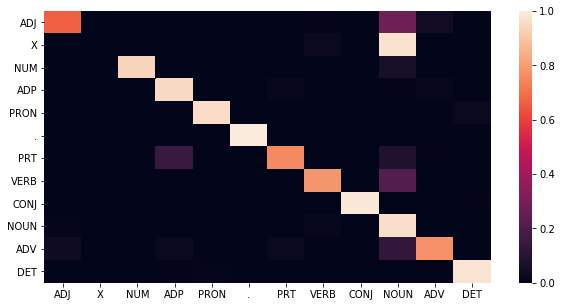

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['figure.figsize'] = [10, 5]

sn.heatmap(cm)

In [9]:
print(accuracy(corpus_advs, tagged))
print(recall(corpus_advs, tagged))
print(precision(corpus_advs, tagged))

0.9071125724669031
0.9071125724669031
0.8490028100090127


# Accuracy of the model based on the size of the training corpus.

In [10]:
corpus = brown.tagged_sents(categories='adventure', tagset='universal')

corpus_len = len(corpus)
train_size = [  1 * corpus_len / 100, 
                5 * corpus_len / 100, 
               10 * corpus_len / 100, 
               25 * corpus_len / 100, 
               50 * corpus_len / 100, 
               80 * corpus_len / 100, 
              100 * corpus_len / 100]

accuracies = []
for length in log_progress(train_size):
    partial_corpus = list(corpus[i] for i in range(0, ceil(length)))

    m = Markovify(smoothing='max')
    fold_scores = cross_validation_score(m, sentences=partial_corpus)
    accuracies.append(np.max([fold['accuracy'] for fold in fold_scores]))
    
print(accuracies)



c:\users\cresp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\cresp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[0.6730769230769231, 0.8861209964412812, 0.8767123287671232, 0.890598862495818, 0.9246090534979424, 0.9353300860192766, 0.9406935835148266]


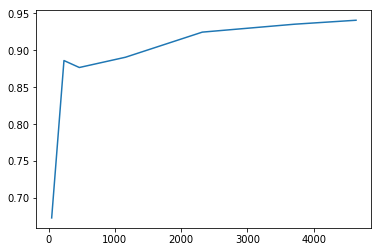

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_size, accuracies)

In [12]:
corpus = brown.tagged_sents(categories='adventure', tagset='universal')

m = Markovify(smoothing='max')
acc, m = cross_validation_score(m, sentences=corpus, return_model=True)

c:\users\cresp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
c:\users\cresp\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5,0,'Recuento del tag')

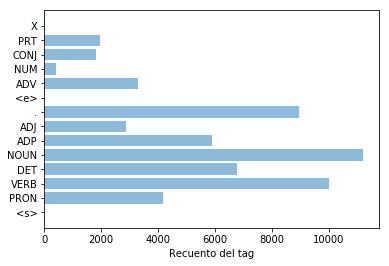

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

tags = m.hmm.q
pos = np.arange(len(tags))
counts = m.hmm.tag_count

plt.barh(pos, counts, align='center', alpha=0.5)
plt.yticks(pos, tags)
plt.xlabel('Recuento del tag')

In [14]:
counts

array([    0.,  4160., 10024.,  6776., 11216.,  5910.,  2882.,  8964.,
           0.,  3289.,   394.,  1805.,  1950.,    34.])